# Grid Runner

## Performance Evaluation

Each pathfinding algorithm in Grid Runner is evaluated by running it 10 times on a common evaluation map and averaging the results.


### Evaluation Map

![Evaluation Map](../assets/images/evaluation_map.PNG)

### Performance Metrics

##### Success Rate
Percentage of runs in which the algorithm successfully reaches the goal on the evaluation map.

##### Average Score
Average total reward collected from coins and trash across all runs.

##### Average Steps Taken
Average number of steps taken by the agent to reach the goal.

##### Average States Explored
Average number of nodes expanded during each algorithm’s search process.

##### Average Compute Time
Average time (in milliseconds) each algorithm takes to compute a path to the goal.

This notebook compiles and averages run data, and plots performance metrics. 


In [1]:
import os
from evaluation.plot import (
    load_from_json, get_averages_from_dicts, 
    plot_success_rate, plot_avg_steps, plot_avg_scores,
    plot_avg_states_explored, plot_avg_compute_time
)

# Import data
BASE_DIR = os.getcwd()
REPORTS_DIR = os.path.join(BASE_DIR, "reports")

filepaths = [
    os.path.join(REPORTS_DIR, "a_star_search.json"),
    os.path.join(REPORTS_DIR, "gbfs.json"),
    os.path.join(REPORTS_DIR, "bfs.json"),
    os.path.join(REPORTS_DIR, "ucs.json"),
    os.path.join(REPORTS_DIR, "rhc.json"),
    os.path.join(REPORTS_DIR, "sa.json"),
]

# Extract data and calculate averages
avg_runs = [get_averages_from_dicts(load_from_json(fp)) for fp in filepaths]

### Success Rate

All algorithms consistently found the goal except Simulated Annealing, which often failed.


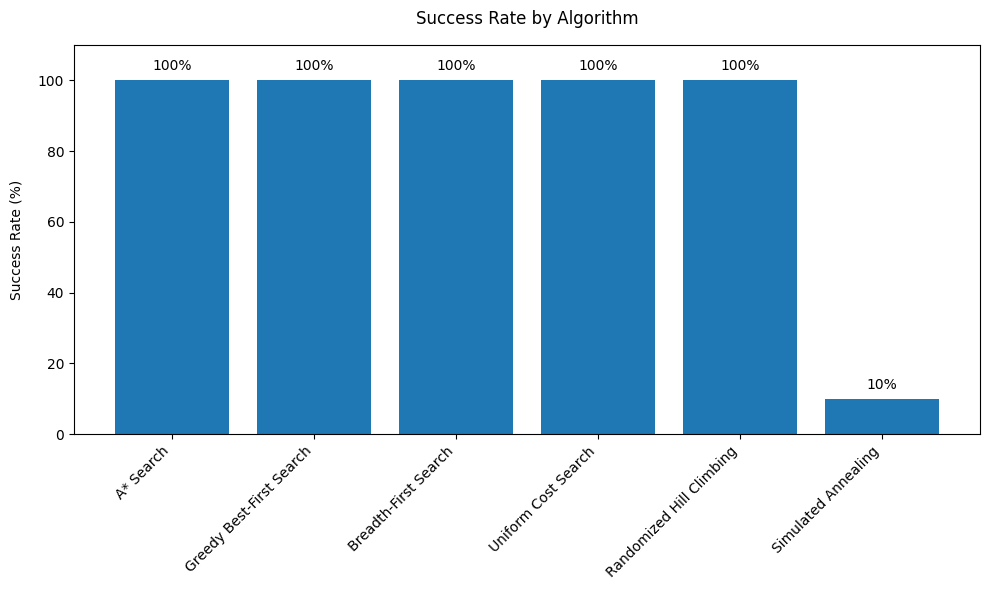

In [2]:
plot_success_rate(avg_runs, save_to_file=True)

### Average Score
Reward-aware algorithms achieved the highest scores, while reward-unaware algorithms prioritized shorter paths over collecting rewards.

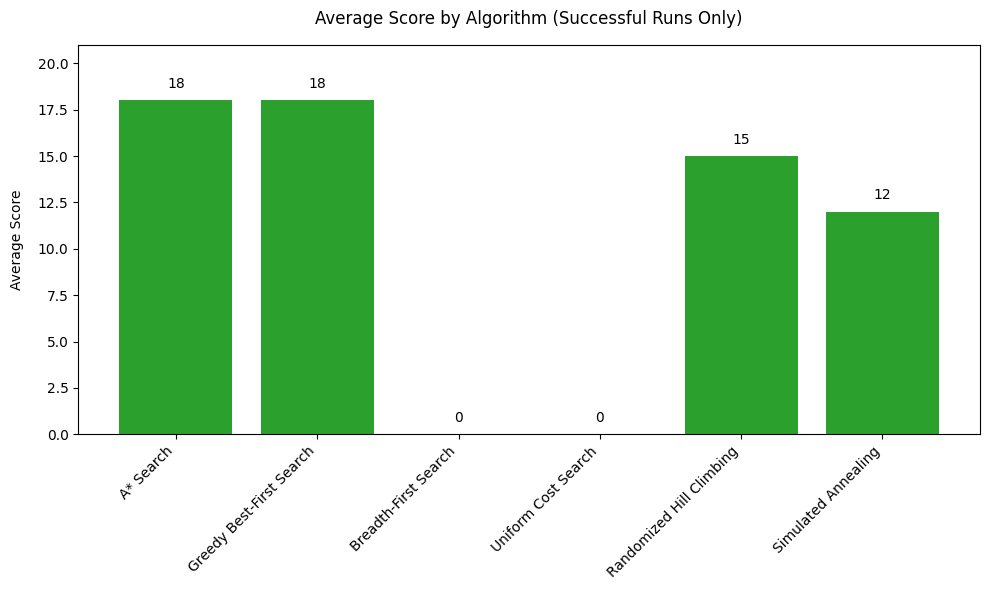

In [3]:
plot_avg_scores(avg_runs, save_to_file=True)

### Average Steps Taken
Reward-aware algorithms took longer routes in order to maximize rewards.

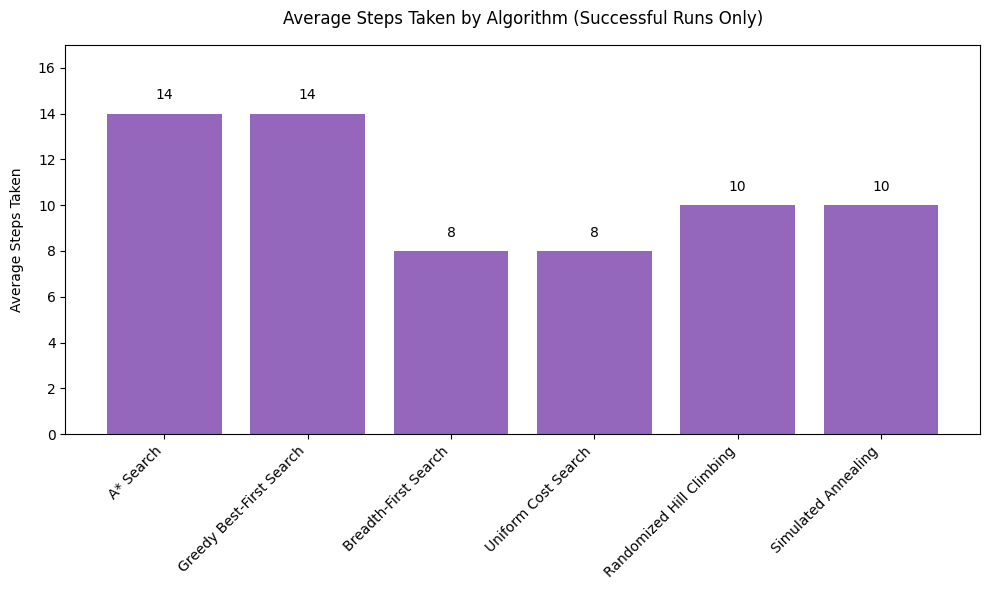

In [4]:
plot_avg_steps(avg_runs, save_to_file=True)

### Average States Explored
Reward-aware informed algorithms expanded significantly more states than the rest, while local search algorithms expanded the fewest.

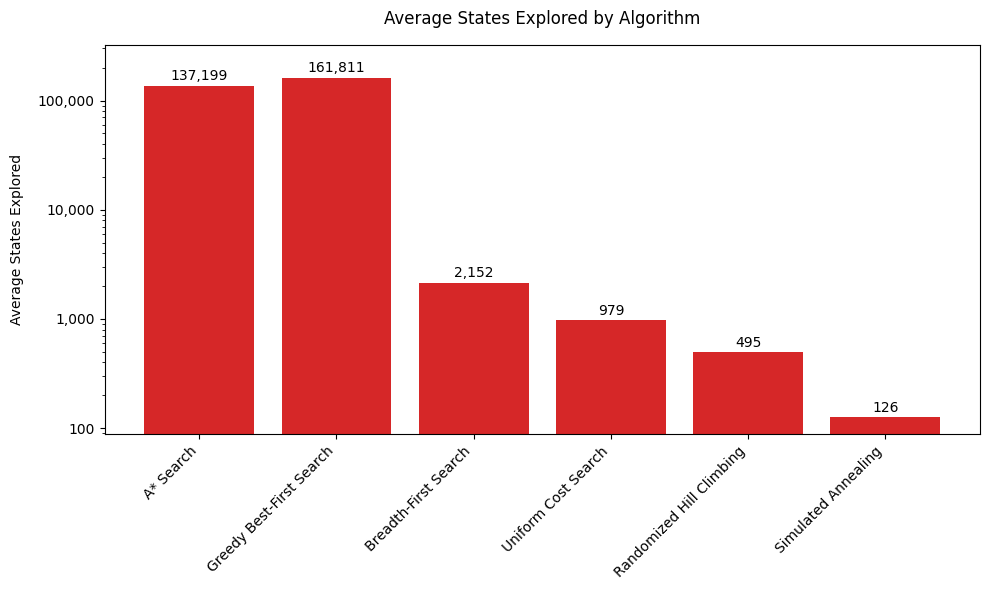

In [5]:
plot_avg_states_explored(avg_runs, save_to_file=True)

### Average Compute Time
Reward-aware informed algorithms are significantly more computationally expensive than the others.

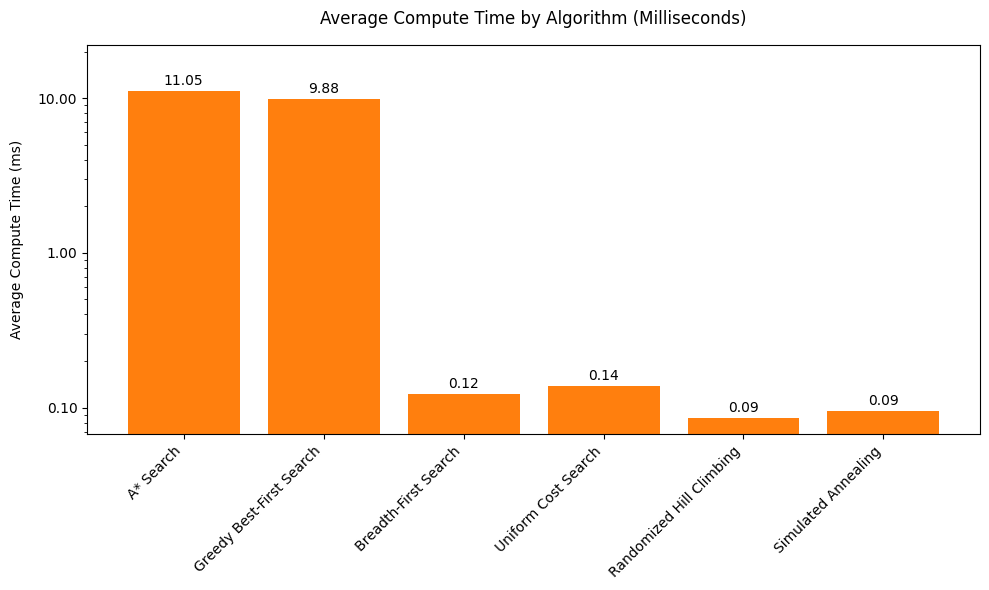

In [6]:
plot_avg_compute_time(avg_runs, save_to_file=True)